<a href="https://colab.research.google.com/github/fulllz/DSProjects/blob/main/Project-1-Part1%20Exploratory%20Data%20Analysis%20(EDA)%20For%20Predicting%20King%20County%20House%20Prices%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#            Project-1 Part1
# Exploratory Data Analysis (EDA) For Predicting King County House Prices

The data set concerns the housing sales in King County, Seattle. How to estimate the marketing price for a house is a realistic problem. All of home buyers, sellers, renters and inverstors concern this problem. We know the house price is continually shifting and may affect by many economic and financial factors. I’m not taking into consideration any unique events in the real estate market or any macroeconomic factors since we need collect more data for that analysis. My objective of the project is to find the correlation between housing price and some intrinsic features such as house size, land area, room number et al.  Housing data for the King County was collected from Kaggle. It came in a form of CSV file. Data was read using Pandas as DataFrame objects. The process of exploratory data analysis (EDA) are:

<a>**data importing**  
**variables summary**  
**records of sales history**  
**target variable: price and data skewness**  
**simple plotting**  
**categorical data**  
**categorical-numerical data**  
**numerical data**  
**checking out the correlation**  
**creating a simple linear regression**


**data importing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [ ]:
df_raw = pd.read_csv('kc_house_data.csv', parse_dates=['date']) 

In [ ]:
df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_raw.shape

(21613, 21)

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

**variables summary**

|Feature | Description  | dtype  |
|----|----|----|
|Id	  |the unique numeric number assigned to each house being sold	|numeric  |
|Date	|the date on which the house was sold out.	|datetime  |
|Price	|the price of house which we have to predict so this is our target variable and apart from it are our features	|numeric  |
|Bedrooms	|number of bedrooms in a house	|numeric  |
|Bathrooms	|number of bathrooms in a bedroom of a house	|numeric |
|sqft_living	|the measurement variable which determines the measurement of house in square foot.	|numeric|
|sqft_lot	|the measurement variable which determines square foot of the lot	|numeric|
|floors	|total floors means levels of house.	|numeric|
|View	|whether a house has been viewed or not 0 means no 1 means yes	|numeric|
|Waterfront	|whether a house has a view to waterfront 0 means no 1 means yes	|numeric|
|Grade	|the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11	|numeric|
|Condition	|the overall condition of a house on a scale of 1 to 5.	|numeric|
|sqft_above	|square footage of house apart from basement |numeric|
|sqft_basement	|square footage of the basement of the house |numeric|
|yr_built	|the date of building of the house |numeric|
|yr_renovated	|year of renovation of house |numeric|
|zip code	|the zip code of the location of the house	|numeric|
|Lat	|the latitude of the location of the house	|numeric|
|Long	|the longitude of the location of the house	|numeric|
|sqft_living 15	|Living room area in 2015(implies some renovations)	|numeric|
|sqft_lot 15	|lot Size area in 2015(implies some renovations)	|numeric|


This is not a very big data and we do not have too many features. Thus, we have chance to plot most of them, explore the pattern in the data and reach some useful analytical results. Drawing charts and examining the data before applying a model is a very good practice because we may detect some possible outliers or decide to do normalization. 

**records of sales history**

In [ ]:
print(df_raw.date.nunique())
print(df_raw.date.min())
print(df_raw.date.max())

372
2014-05-02 00:00:00
2015-05-27 00:00:00


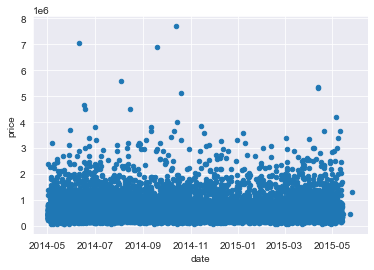

In [ ]:
df_raw.plot(kind='scatter', x='date', y='price');

The dataset includes 372-days sales information from 2014-05-02 to 2015-05-27. Several outliers of price are found in the graph.

**target variable: price and data skewness**

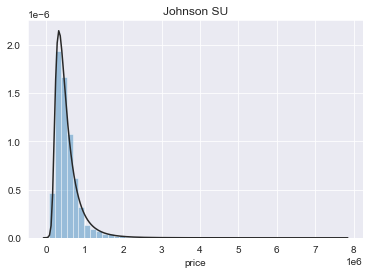

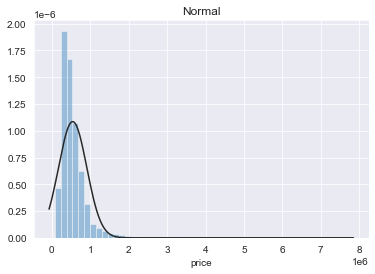

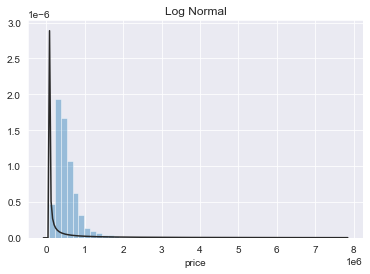

In [ ]:
price =df_raw['price'] 
plt.figure(1); 
plt.title('Johnson SU')
sns.distplot(price, kde=False, fit=st.johnsonsu)

plt.figure(2); 
plt.title('Normal')
sns.distplot(price, kde=False, fit=st.norm)

plt.figure(3); 
plt.title('Log Normal')
sns.distplot(price, kde=False, fit=st.lognorm)

plt.show()

Given from the histogram: The saleprice has appreciable positive skewness,
deviates from the normal distribution and
shows peakedness.
Let's take a look at the skewness and kurtosis in numbers:

In [ ]:
print('Skewness: %f' % df_raw['price'].skew())
print('Kurtosis: %f' % df_raw['price'].kurt())

Skewness: 4.021716
Kurtosis: 34.522444


**simple plotting**

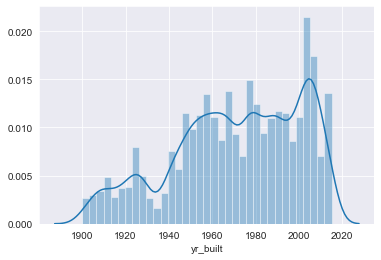

In [ ]:
plt.figure()
sns.distplot(df_raw['yr_built'])
plt.show()

House ages appear three peaks in 1920s, 1960s and 2000s.

In [ ]:
df1 = df_raw.groupby(['zipcode'])['price'].mean().reset_index()
df1.head()                              

,zipcode,price
0,98001,2.808047e+05
1,98002,2.342840e+05
2,98003,2.941113e+05
3,98004,1.356524e+06
4,98005,8.102897e+05


In [ ]:
df_raw['zipcode'] = df_raw['zipcode'].astype('category')

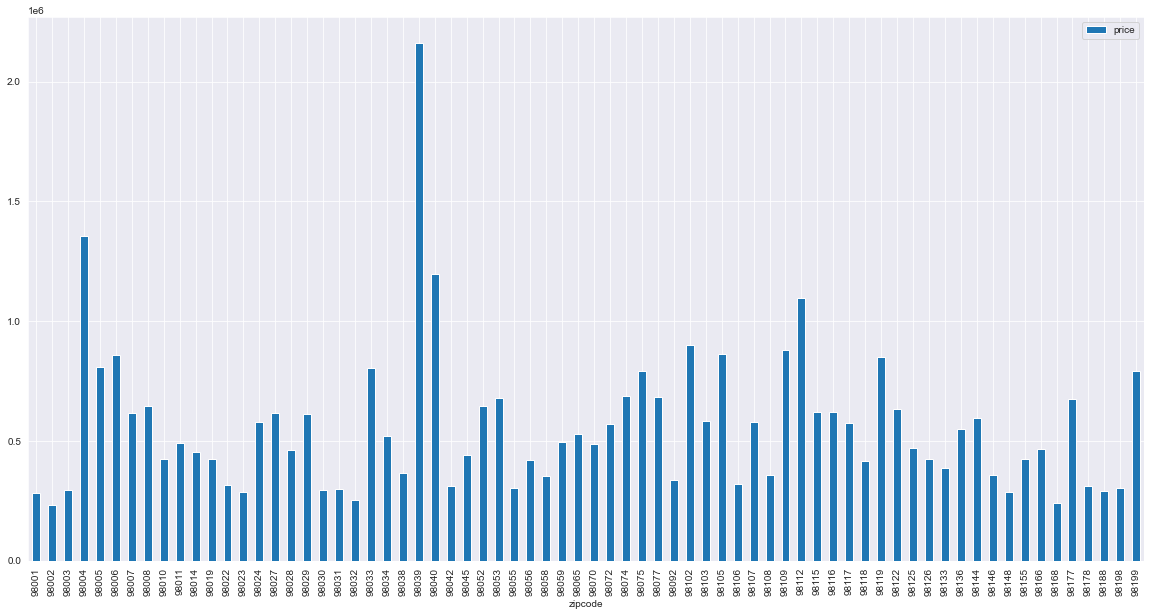

In [ ]:
df5.plot(kind='bar', x='zipcode', y='price',figsize=(20,10));

This gragh shows the change of the mean prices of house sales with zip codes.

**categorical data**

I will encode the following as categorical data: Bedrooms, Bathrooms, Floors, view, condition and grade.  but the features of Bedrooms, and Bathrooms will  be considered as numeric during modeling.

In [ ]:
categorical_features = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade']

In [ ]:
for c in categorical_features:
    df_raw[c] = df_raw[c].astype('category')

In [ ]:
y = df_raw['price'] 

In [ ]:
df_raw['view'].nunique()

5

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  category      
 4   bathrooms      21613 non-null  category      
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  category      
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  category      
 10  condition      21613 non-null  category      
 11  grade          21613 non-null  category      
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

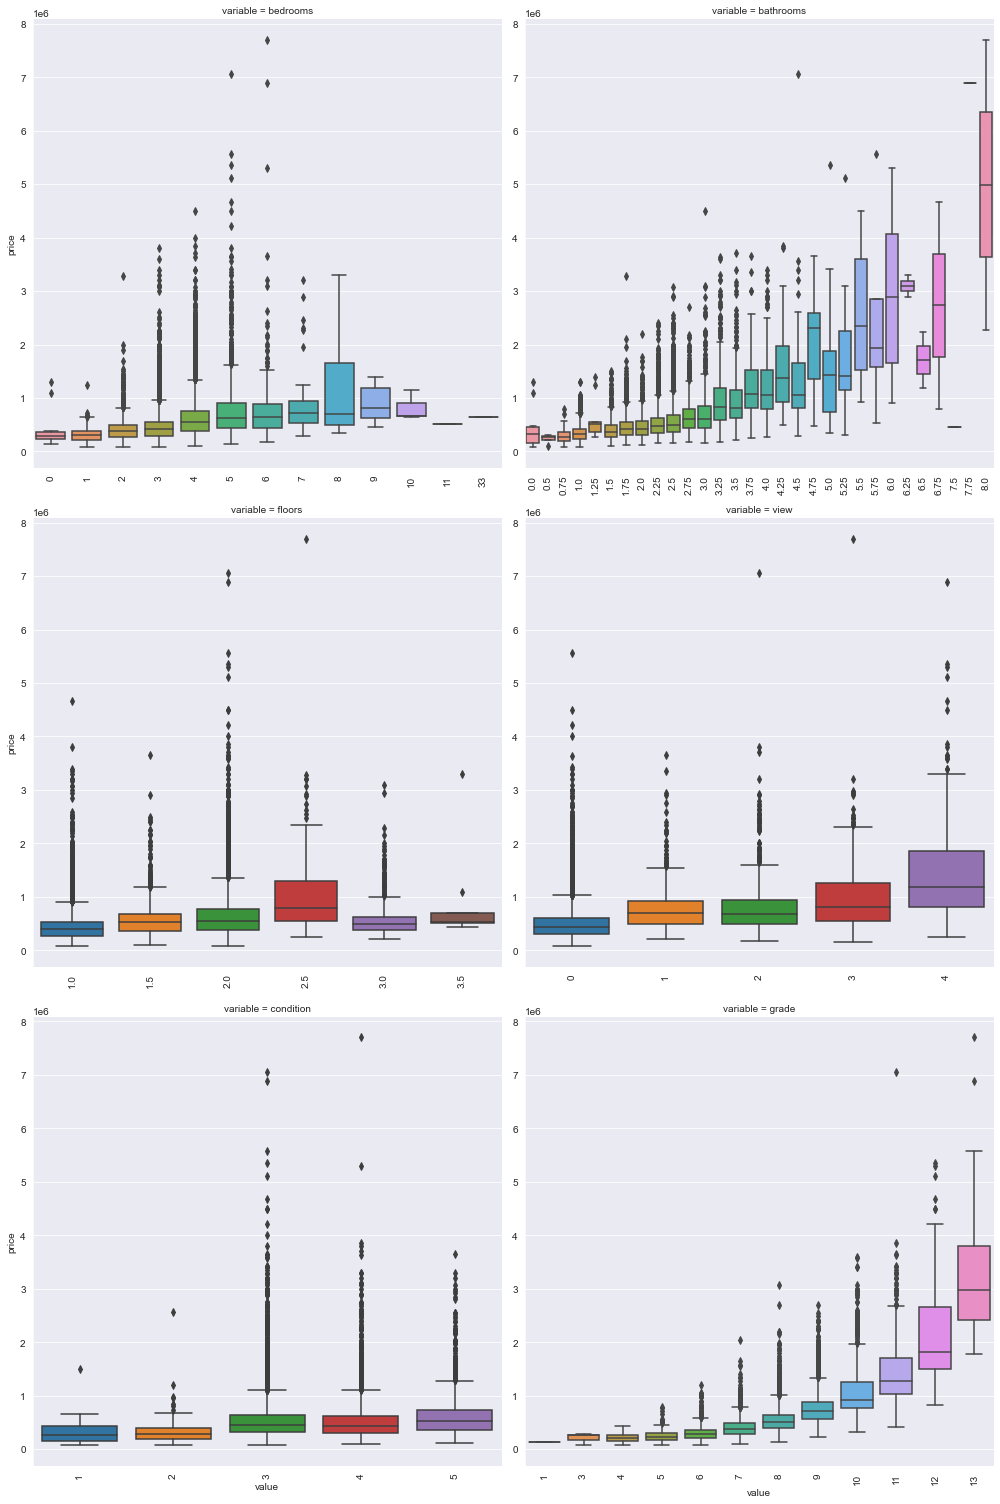

In [ ]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(df_raw, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=6)
g = g.map(boxplot, "value", "price")

From the above charts, it can be seen that there are very few houses which have some features or price appears far from others like 33 bedrooms or price around 7000000. In the real data sets there will always be some outliers like some luxury house prices in this dataset. So I am not planning to remove outliers.

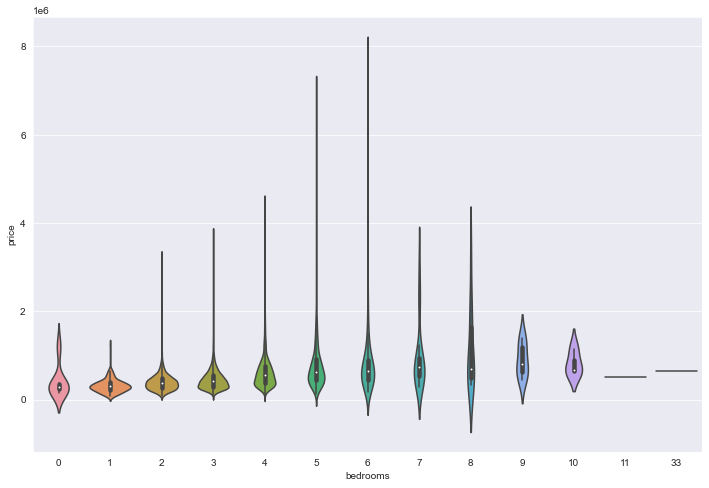

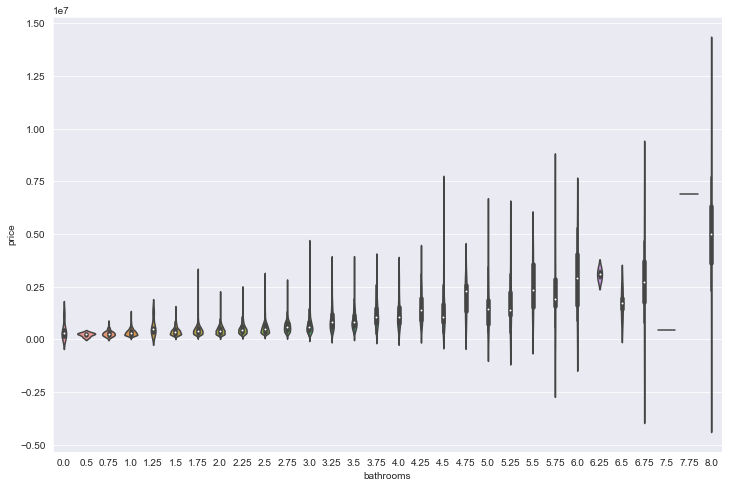

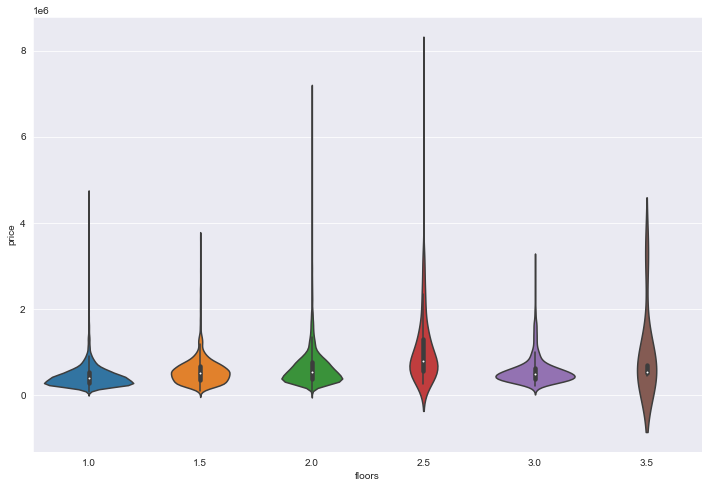

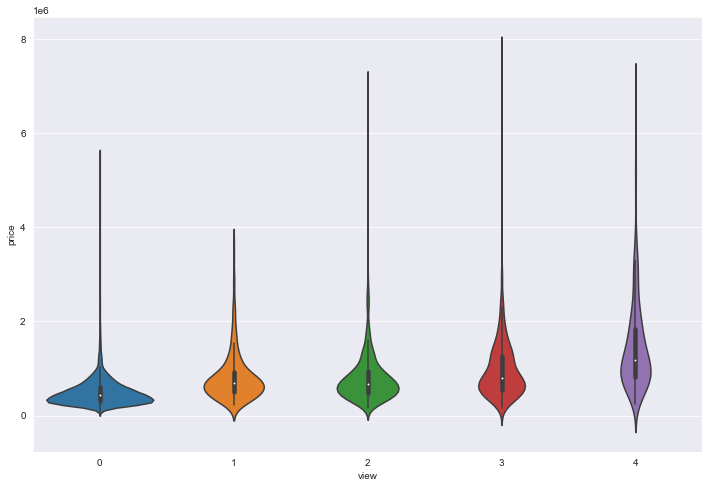

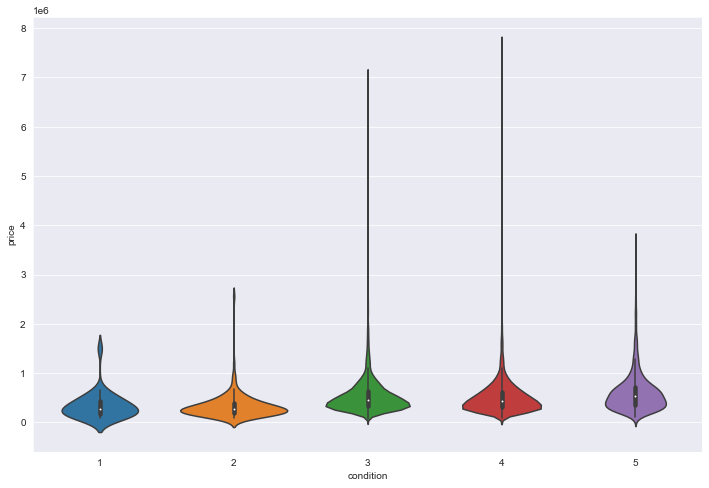

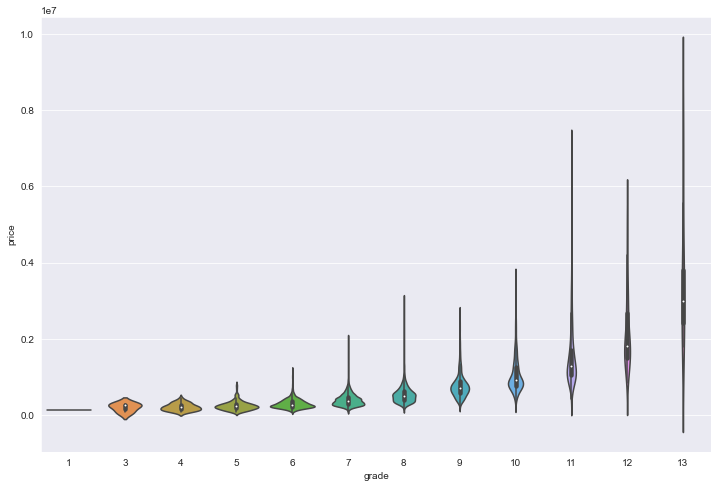

In [ ]:
for cat in categorical_features :
    plt.figure(figsize=(12,8))
    sns.violinplot(x=cat, y='price', data=df_raw)
    plt.show()

C:\Users\meitao\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


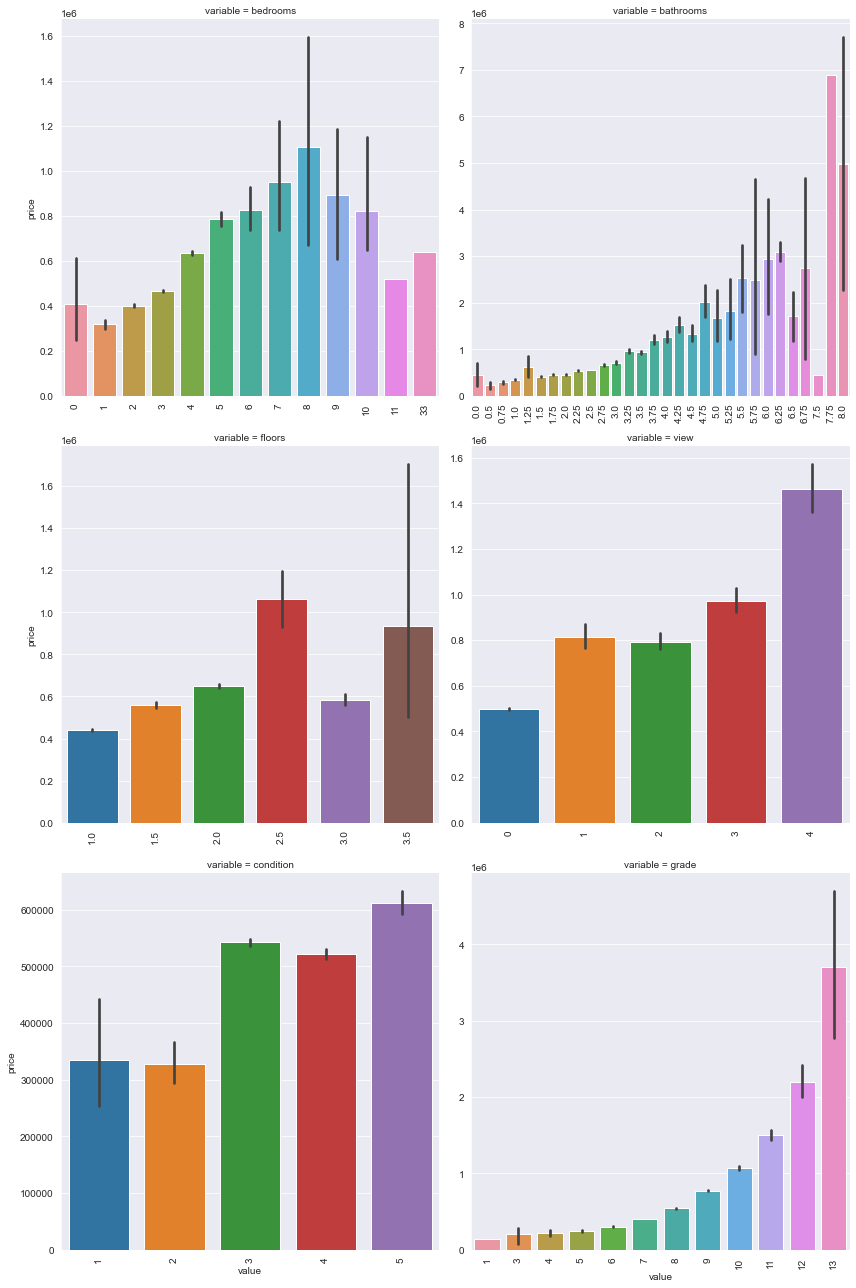

In [ ]:
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(df_raw, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=6)
g = g.map(bar_plot, "value", "price")

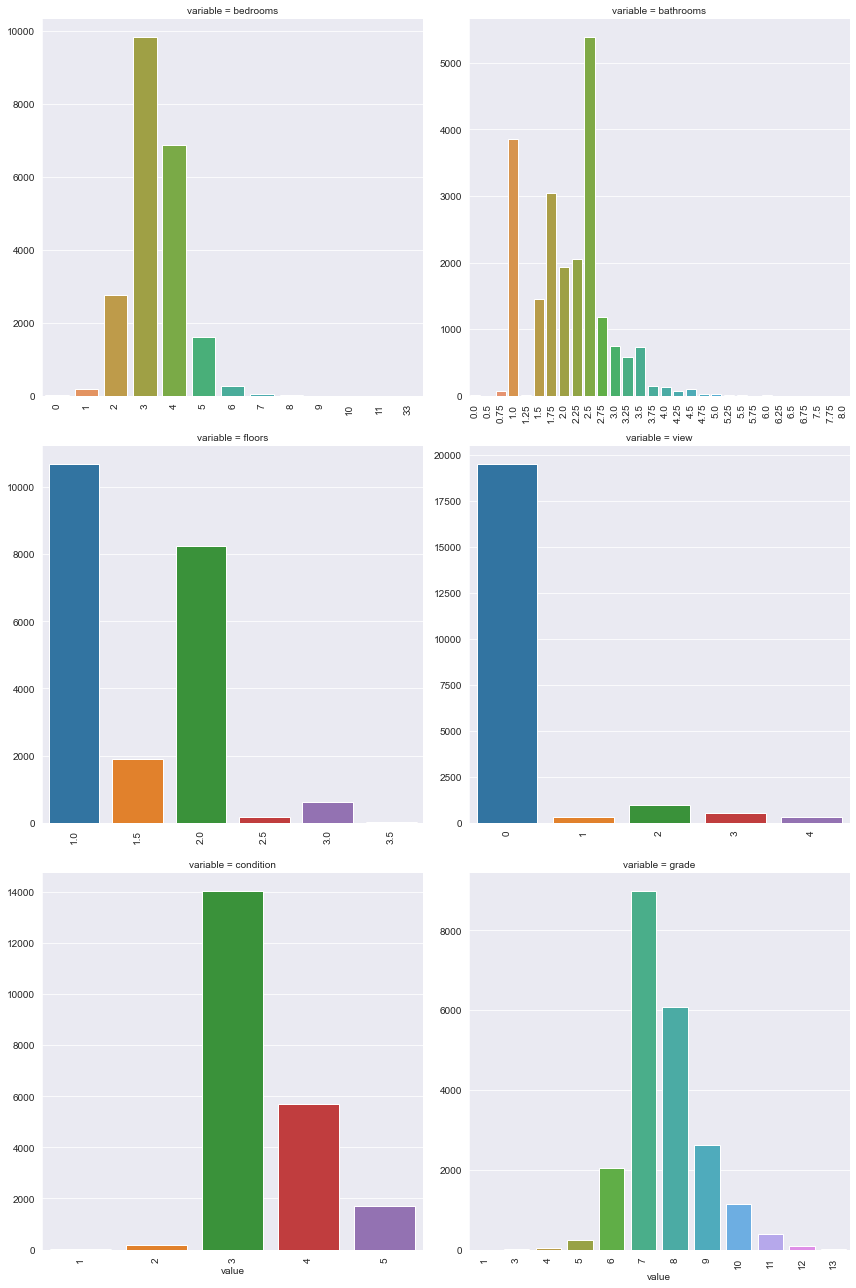

In [ ]:
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(df_raw,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=6)
g = g.map(count_plot, "value")

**categorical-numerical data**

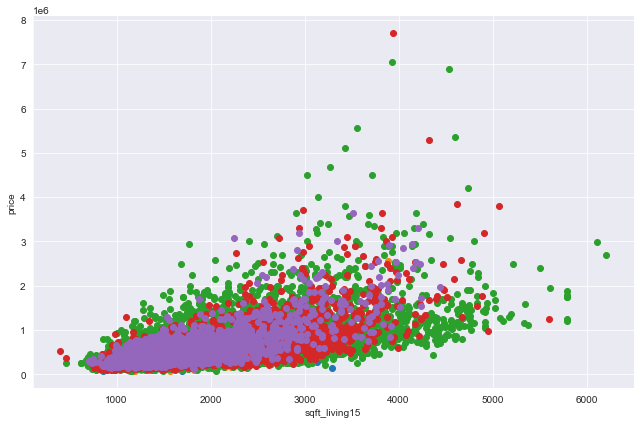

In [ ]:
g = sns.FacetGrid(data=df_raw, hue='condition', height=6, aspect=1.5)
g.map(plt.scatter, 'sqft_living15', 'price')
plt.show()

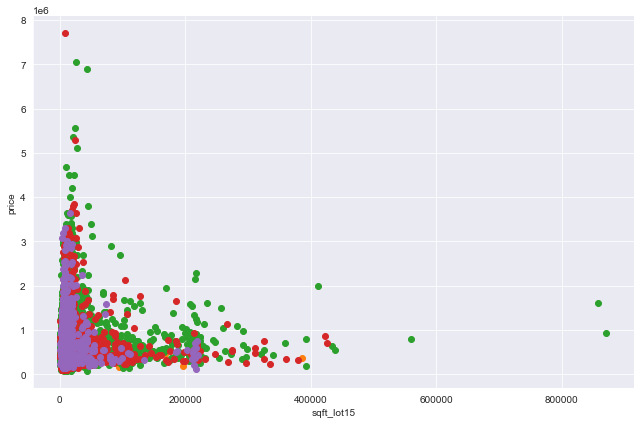

In [ ]:
g = sns.FacetGrid(data=df_raw, hue='condition', height=6, aspect=1.5)
g.map(plt.scatter, 'sqft_lot15', 'price')
plt.show()

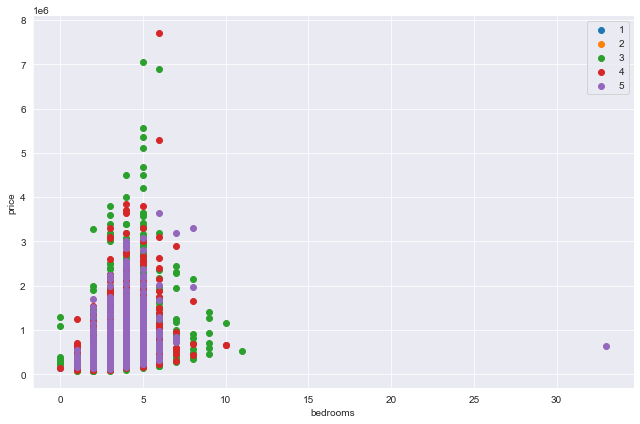

In [ ]:
g = sns.FacetGrid(data=df_raw, hue='condition', height=6, aspect=1.5)
g.map(plt.scatter, 'bedrooms', 'price')
plt.legend()
plt.show()

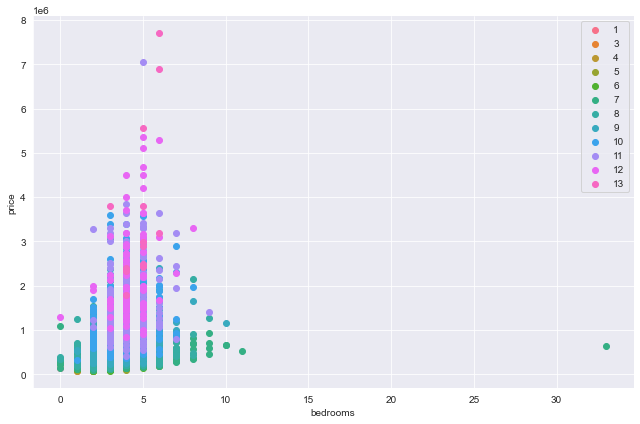

In [ ]:
g = sns.FacetGrid(data=df_raw, hue='grade', height=6, aspect=1.5)
g.map(plt.scatter, 'bedrooms', 'price')
plt.legend()
plt.show()

In [ ]:
numeric_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

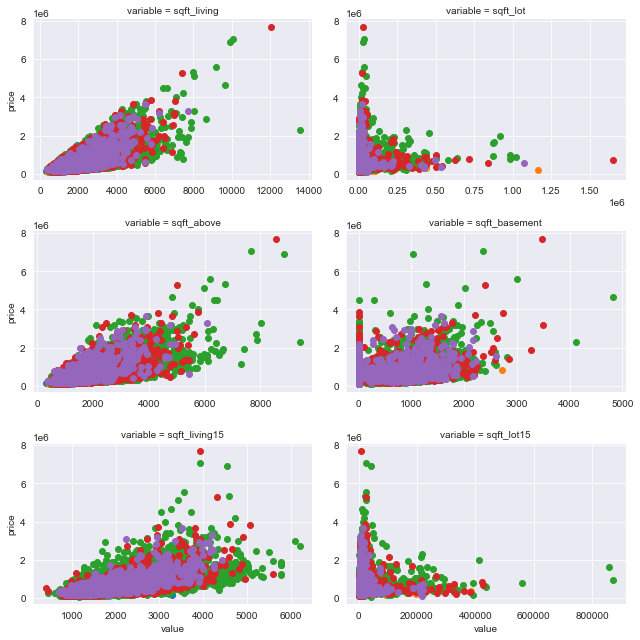

In [ ]:
f = pd.melt(df_raw, id_vars=['price', 'condition'], value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable", hue='condition', col_wrap=2, sharex=False, sharey=False, aspect=1.5)
g.map(plt.scatter, 'value', 'price')

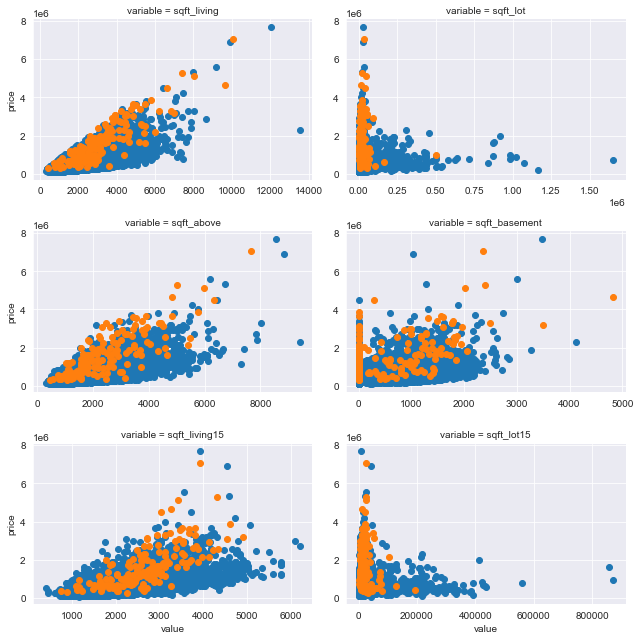

In [ ]:
f = pd.melt(df_raw, id_vars=['price', 'waterfront'], value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable", hue='waterfront', col_wrap=2, sharex=False, sharey=False, aspect=1.5)
g.map(plt.scatter, 'value', 'price')

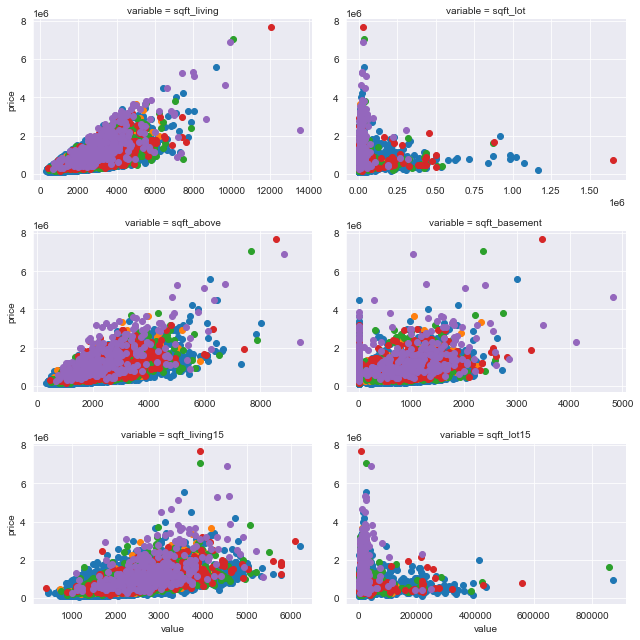

In [ ]:
f = pd.melt(df_raw, id_vars=['price', 'view'], value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable", hue='view', col_wrap=2, sharex=False, sharey=False, aspect=1.5)
g.map(plt.scatter, 'value', 'price')

**numerical data**

In [ ]:
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df_raw[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df_raw[col].kurt())  
         )

sqft_living     Skewness: 01.47     Kurtosis: 005.24
sqft_lot        Skewness: 13.06     Kurtosis: 285.08
sqft_above      Skewness: 01.45     Kurtosis: 003.40
sqft_basement   Skewness: 01.58     Kurtosis: 002.72
sqft_living15   Skewness: 01.11     Kurtosis: 001.60
sqft_lot15      Skewness: 09.51     Kurtosis: 150.76


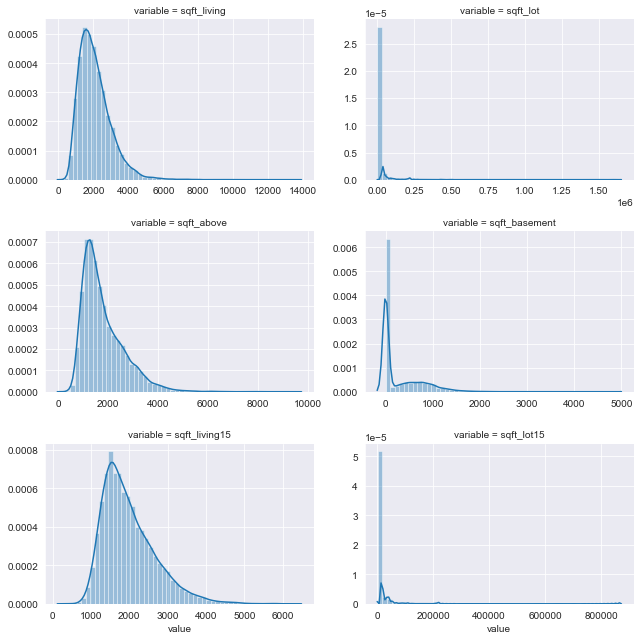

In [ ]:
f = pd.melt(df_raw, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, aspect=1.5)
g = g.map(sns.distplot, "value")


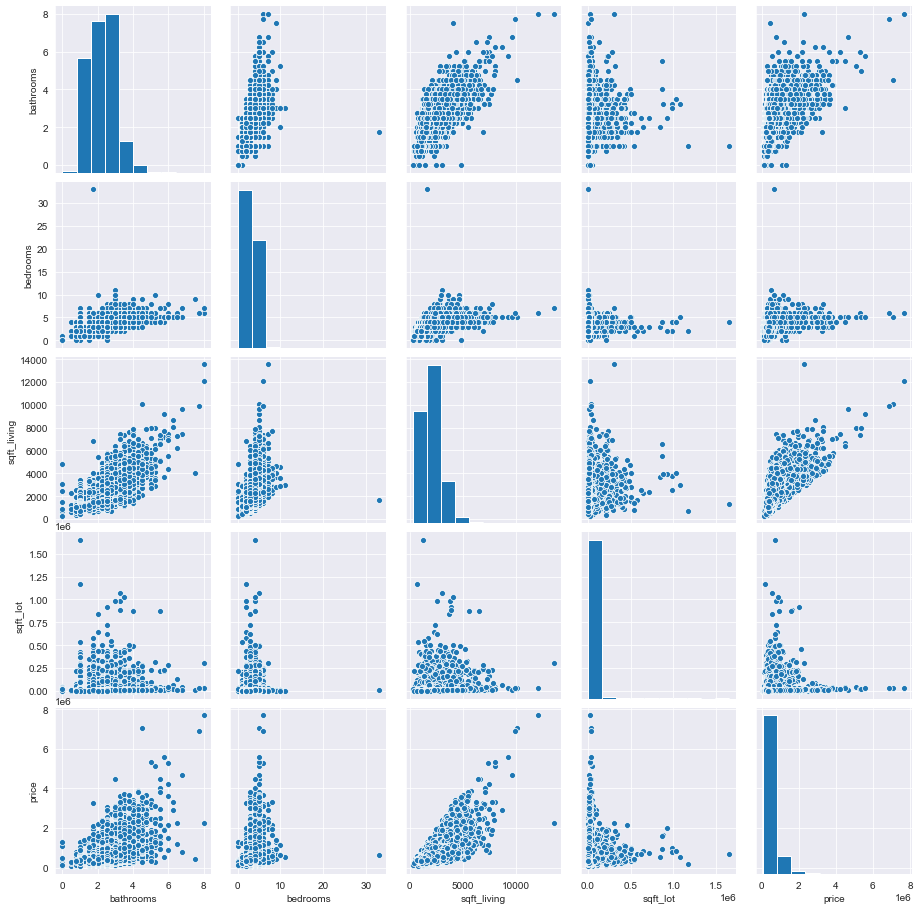

In [ ]:
sns.pairplot(df_raw[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'price']])
plt.show()

I drew the price vs some features and it seems that there is not a perfect linear relationship between the price and these features.  

In [ ]:
df_raw['log_price'] = np.log10(df_raw['price'])
df_raw['log_sqft_lot'] = np.log10(df_raw['sqft_lot'])
#df_raw['log_bedrooms'] = np.log10(df_raw['bedrooms'])
df_raw['log_sqft_living'] = np.log10(df_raw['sqft_living'])

In [ ]:
df2= df_raw.copy()

In [ ]:
df2['bedrooms'] = df2['bedrooms'].astype('int')
df2['bathrooms'] = df2['bathrooms'].astype('int')
df2 = df2[df2['bedrooms']<30]
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_sqft_lot,log_sqft_living
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,5.346157,3.752048,3.071882
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,5.730782,3.859859,3.409933
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,5.255273,4.000000,2.886491
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,5.781037,3.698970,3.292256
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,5.707570,3.907411,3.225309


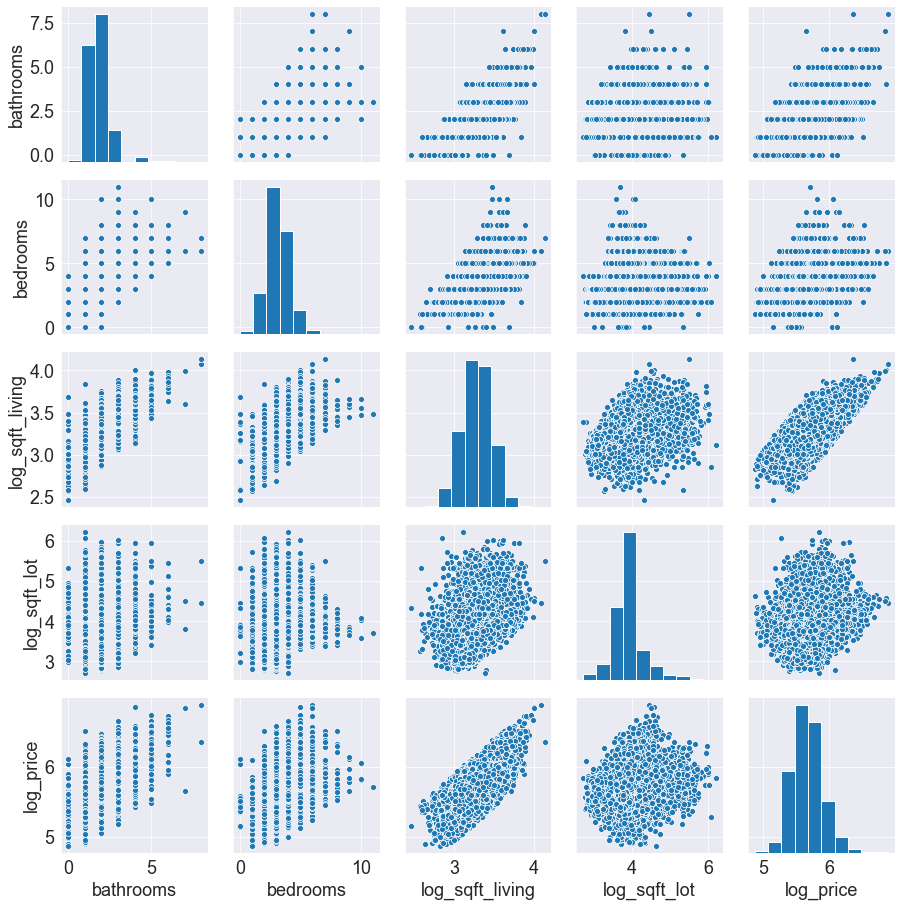

In [ ]:
matplotlib.rcParams['font.size'] = 18
g = df2[['bathrooms', 'bedrooms', 'log_sqft_living', 'log_sqft_lot', 'log_price']]
sns.pairplot(g)
plt.show()

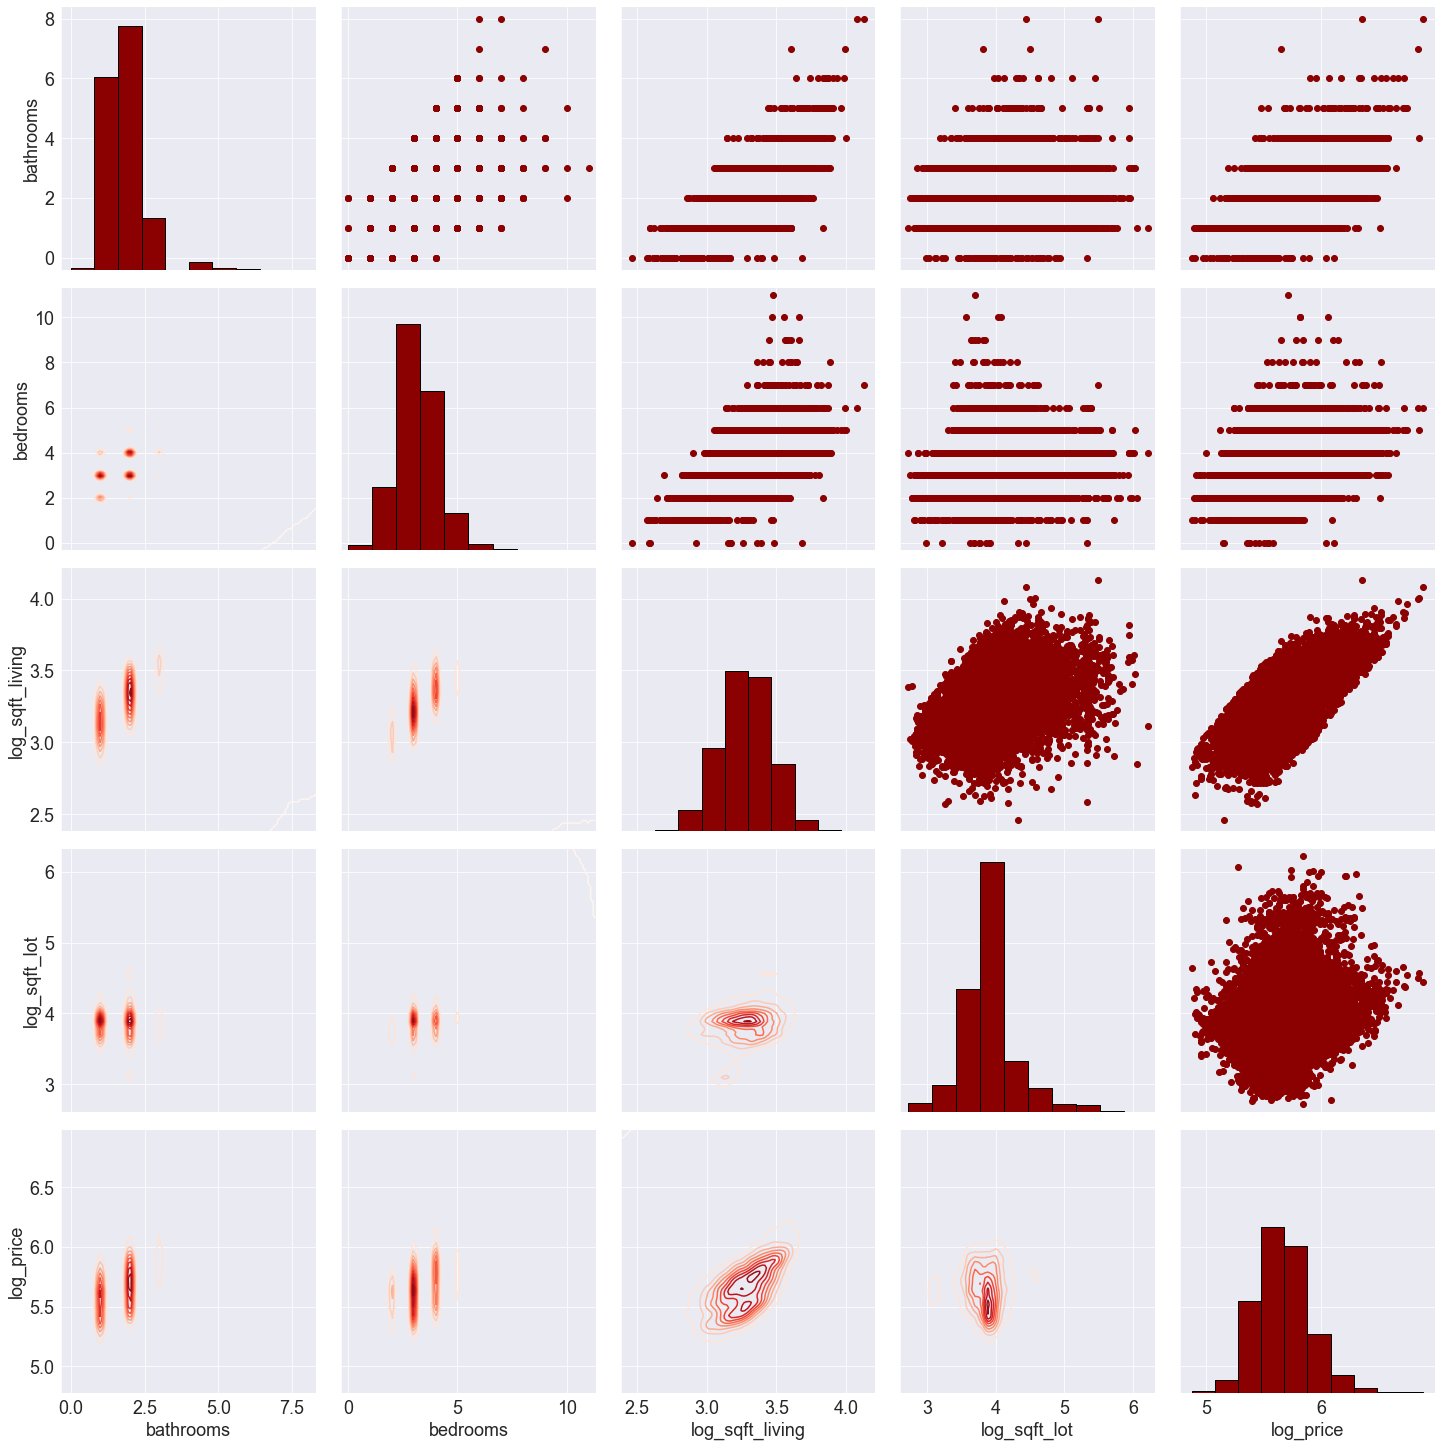

In [ ]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= df2, vars = g, height = 4)

# Map different plots to different sections
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_lower(sns.kdeplot, cmap= 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k');

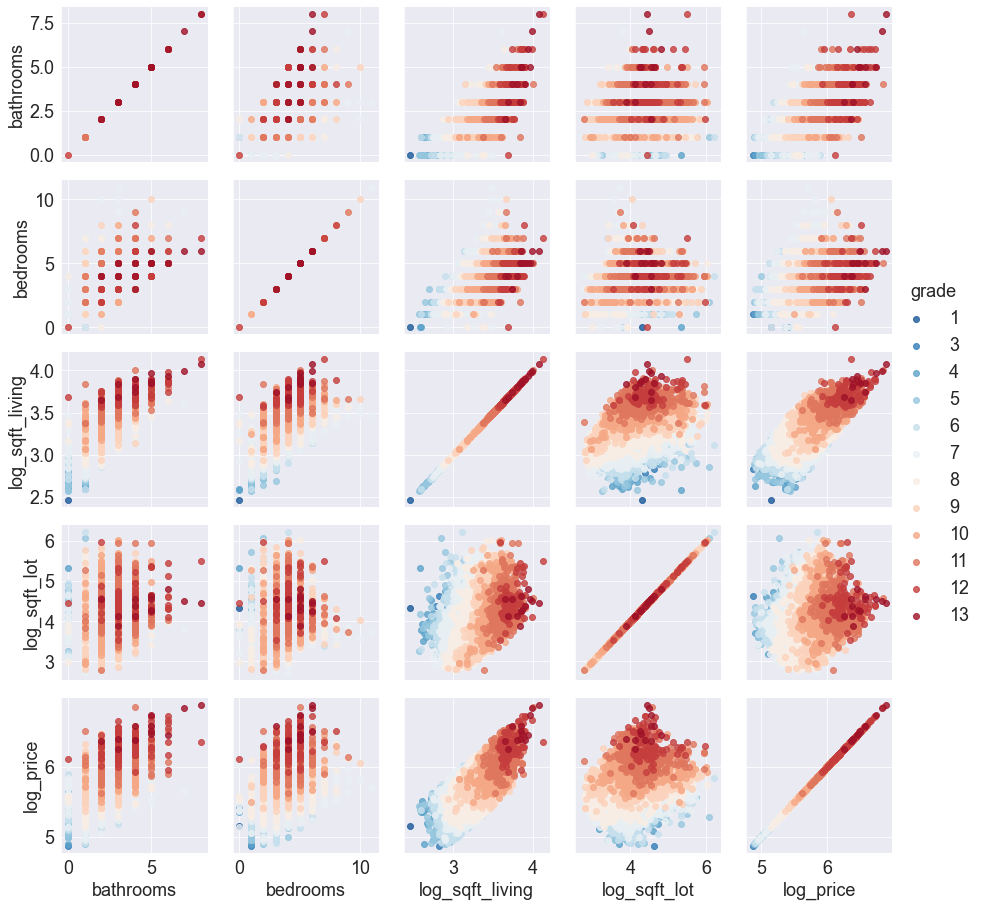

In [ ]:
g = sns.PairGrid(df2, vars=g, hue='grade', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

**Checking Out the Correlation**

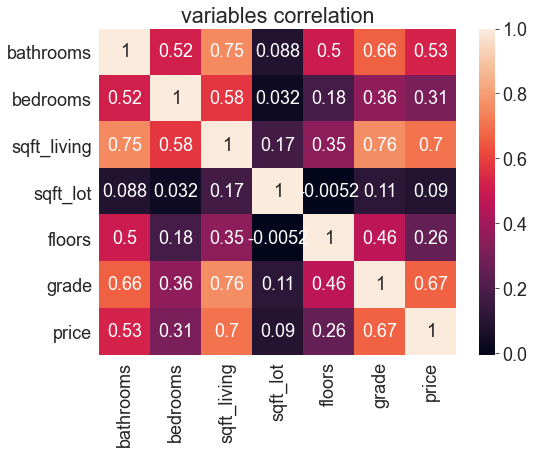

In [ ]:
df_corr = df_raw[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]
plt.figure(figsize=(8,6))
plt.title('variables correlation')
sns.heatmap(df_corr.astype(float).corr(), vmax=1.0, annot=True)
plt.show()

Having too many features in a model is not always a good thing because it might cause overfitting and worser results when we want to predict values for a new dataset. Thus, if a feature does not improve your model a lot, not adding it may be a better choice.

Another important thing is correlation. If there is very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting. For instance, if there is overfitting, we may remove sqt_above or sqt_living because they are highly correlated. This relation can be estimated when we look at the definitions in the dataset but to be sure correlation matrix should be checked. However, this does not mean that you must remove one of the highly correlated features. For example: bathrooms and sqrt_living. They are highly correlated but I do not think that the relation among them is the same as the relation between sqt_living and sqt_above.

**Creating a Simple Linear Regression**

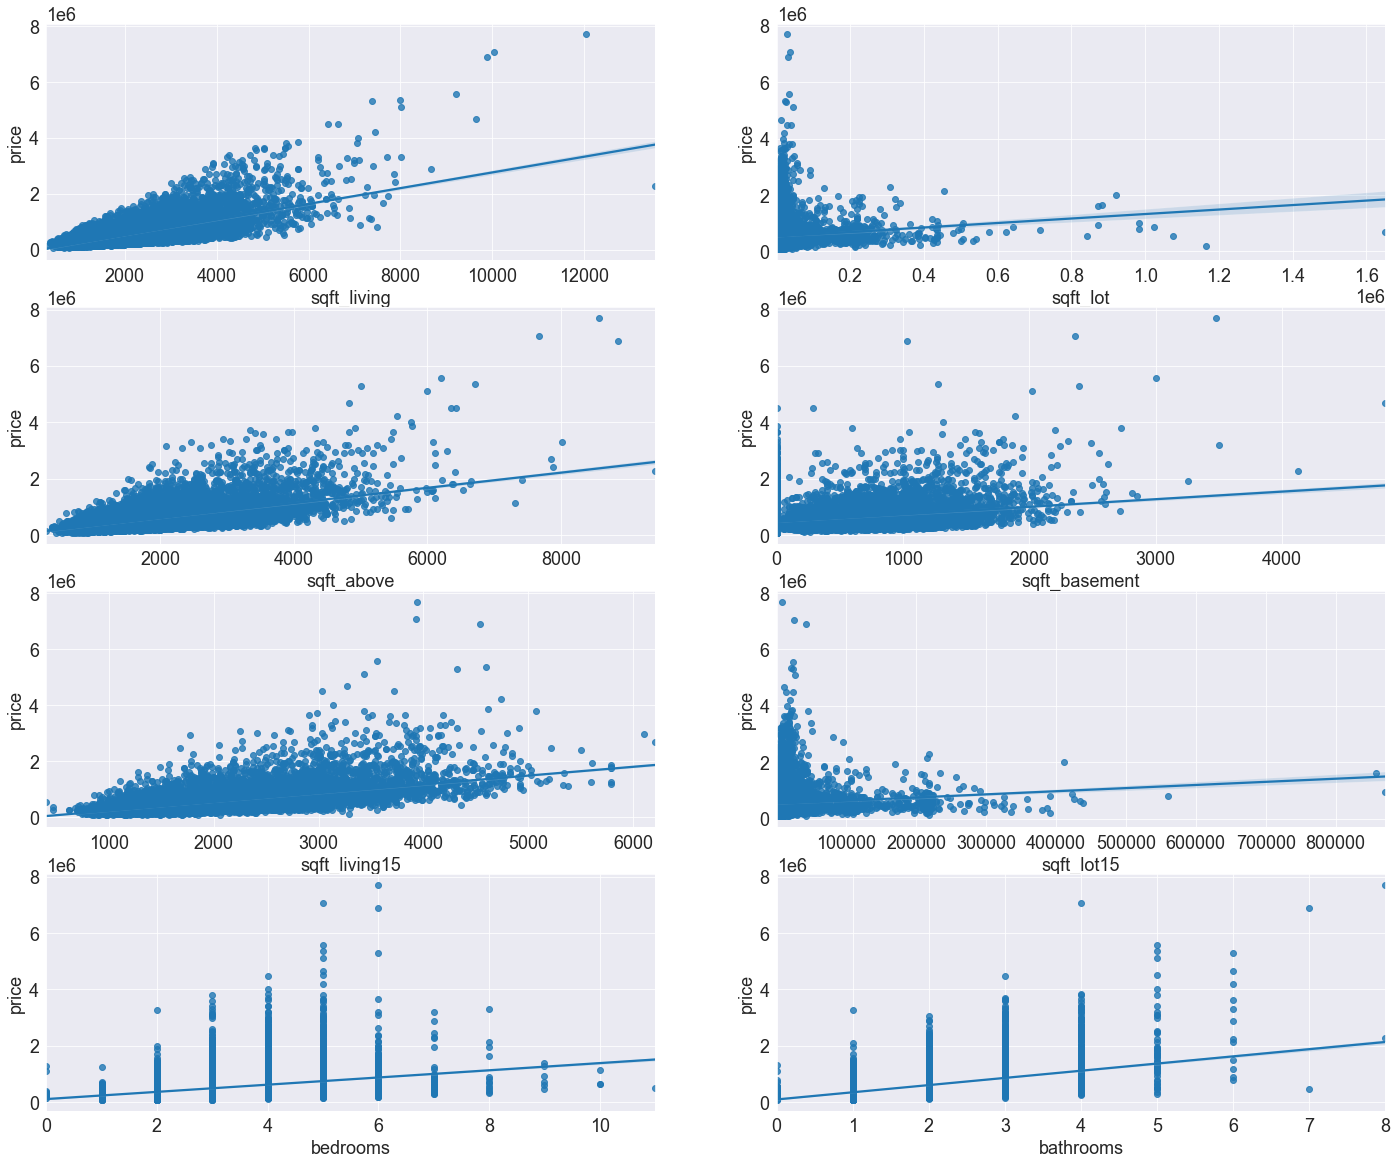

In [ ]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(nrows=4, ncols=2, figsize=(24, 20))
# 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'bathrooms'

sns.regplot(x='sqft_living',y = 'price', data = df2 ,scatter= True, fit_reg=True, ax=ax1)
sns.regplot(x='sqft_lot',y = 'price', data = df2 ,scatter= True, fit_reg=True, ax=ax2)
sns.regplot(x='sqft_above',y = 'price', data = df2 ,scatter= True, fit_reg=True, ax=ax3)
sns.regplot(x='sqft_basement',y = 'price', data = df2, scatter= True, fit_reg=True, ax=ax4)
sns.regplot(x='sqft_living15',y = 'price', data = df2, scatter= True, fit_reg=True, ax=ax5)
sns.regplot(x='sqft_lot15',y = 'price', data = df2, scatter= True, fit_reg=True, ax=ax6)
sns.regplot(x='bedrooms',y = 'price', data = df2, scatter= True, fit_reg=True, ax=ax7)
sns.regplot(x='bathrooms',y = 'price', data = df2, scatter= True, fit_reg=True, ax=ax8)

When we model a linear relationship between target variable and just one feature variable, this is called simple linear regression. For a simple model we also need to select a feature. When I look at the columns of the dataset, living area (sqft) seemed the most important feature. When we examine the correlation matrix, we may observe that price has the highest correlation coefficient with living area. Thus, I decided to use living area as feature and examine the relationship between price and living area.

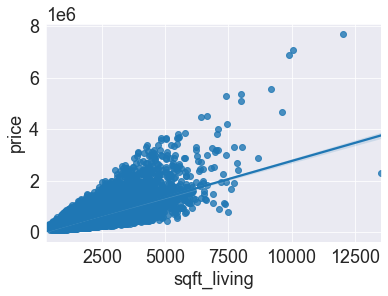

In [ ]:
sns.regplot(x='sqft_living', y='price', data=df2)
plt.show()

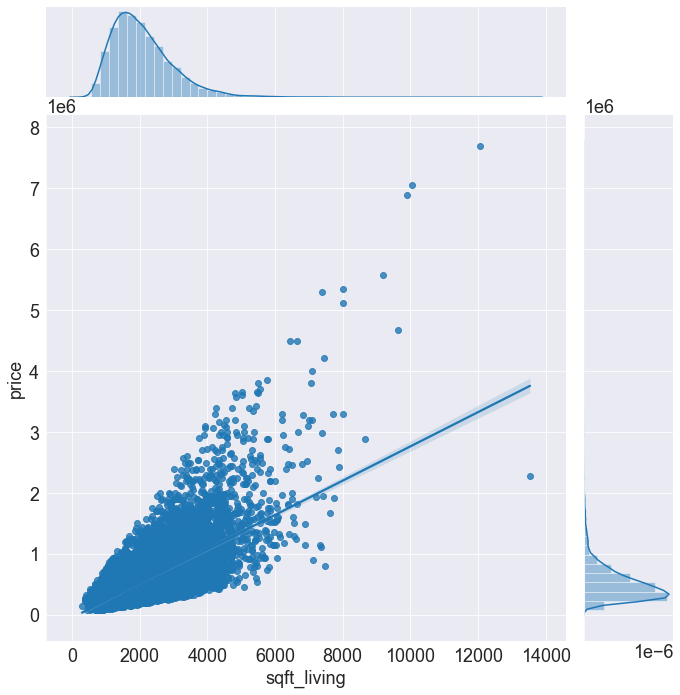

In [ ]:
sns.jointplot(x="sqft_living", y='price', data=df2, kind="reg", height =10)
plt.show()